# <h1>  Video Analytics Interface</h1> #

In [23]:
#packages
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
    
from tkhtmlview  import HTMLLabel
from tkinter import *
import tkinter as tk
import PIL
from PIL import ImageTk, Image
    

In [24]:
video = cv2.VideoCapture("test1_walkPeople.mp4")
framet_reference = cv2.imread("scene.jpg")

if (video.isOpened() == False):
    print("Error opening video stream or file \n \n !!!!!!!!!")
    

In [25]:
volume = []
while(True):
    ret , fram = video.read()
    if ret == True:
        gray = cv2.cvtColor(fram,cv2.COLOR_BGR2GRAY)
            
        volume.append(gray)
    else:
        break 

volume3D = np.array(volume)

In [26]:
volume3D.shape

(990, 480, 854)

In [27]:
def video_original():
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 

    for i in range(volume3D.shape[0]):
    
        video.write(volume3D[i])
        cv2.imshow('frame', volume3D[i])
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break

    #difference.append(dif)
    #cv2.imshow("difference", difference)
    
    video.release()
    cv2.destroyAllWindows()

In [28]:
def diferancing():
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 
    
    
    frame=np.array(volume3D[3], dtype='uint8')
    for i in range(volume3D.shape[0]):
    
        dife= cv2.absdiff(volume3D[i] , frame)
    
        video.write(dife)
        cv2.imshow('frame', dife)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break

    #difference.append(dif)
    #cv2.imshow("difference", difference)
    
    video.release()
    cv2.destroyAllWindows()

In [29]:
def diferancing_threshold():
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 
    
    
    frame=np.array(volume3D[3], dtype='uint8')
    for i in range(volume3D.shape[0]):
    
        dife= cv2.absdiff(volume3D[i] , frame)
        
        _ , diff_thr = cv2.threshold(dife, 25, 255, cv2.THRESH_BINARY)
    
        video.write(diff_thr)
        cv2.imshow('frame', diff_thr)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
        
    
    video.release()
    cv2.destroyAllWindows()

In [30]:
def derive_temporelle():
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 


    for i in range(volume3D.shape[0]-1):
    
        diff = cv2.absdiff(volume3D[i+1] , volume3D[i])
        
        video.write(diff)
    
        cv2.imshow('frame', diff)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()

In [31]:
def derive_temporelle_threshold():
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 


    for i in range(volume3D.shape[0]-1):
    
        diff = cv2.absdiff(volume3D[i+1] , volume3D[i])
        
        _ , diff_thr = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)
        
        video.write(diff_thr)
    
        cv2.imshow('frame', diff_thr)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()

In [32]:
#calcul le moyenne de video entière :
def changer_frames(n, i):
    frames=[]
    for j in range(n):
        
        frames.append(volume3D[i-j])
        
    frames = np.array(frames)
    return frames

In [33]:
def mean_def():
    
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2]))

    volume_mean=volume3D[0]
    n=20

    for i in range(20, volume3D.shape[0]-1):
        
        volume_mean = changer_frames(n, i)
    
        mean_frame = np.mean(volume_mean, axis=0)
    
        mean_frame = np.array(mean_frame, dtype='uint8')
    
        diff_mean = cv2.absdiff(volume3D[i+1] , mean_frame)
    
        video.write(diff_mean)
    
        cv2.imshow('frame', diff_mean)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()

In [34]:
def mean_def_threshold():
    
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2]))

    volume_mean=volume3D[0]
    n=20

    for i in range(20, volume3D.shape[0]-1):
        
        volume_mean = changer_frames(n, i)
    
        mean_frame = np.mean(volume_mean, axis=0)
    
        mean_frame = np.array(mean_frame, dtype='uint8')
    
        diff_mean = cv2.absdiff(volume3D[i+1] , mean_frame)
        
        _ , diff_thr = cv2.threshold(diff_mean, 90, 255, cv2.THRESH_BINARY)
    
        video.write(diff_thr)
    
        cv2.imshow('frame', diff_thr)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()

In [35]:
def moyenne_gliss():
    
    volume_mean=volume3D[0]

    for i in range(1, volume3D.shape[0]-1):
    
        volume_mean = np.dstack((volume_mean, volume3D[i+1]))
    
        mean_frame = np.mean(volume_mean, axis=2)
    
        mean_frame_gliss = (i-1)/i * mean_frame + (1/i) * volume3D[i+1]
    
        diff_mean = cv2.absdiff(volume3D[i+1] , mean_frame_gliss)
    
        video.write(diff_mean)
    
        cv2.imshow('frame', diff_mean)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()

In [36]:
def median():
    
        
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 

    volume_median=volume3D[0]
    n=10

    for i in range(10, volume3D.shape[0]-1):
        
        volume_median = changer_frames(n, i)
        
        volume_median = np.median(volume_median, axis=0)
    
    
        median_frame = np.array(volume_median, dtype='uint8')
    
        diff_median = cv2.absdiff(volume3D[i+1] , median_frame)
        
    
        video.write(diff_median)
    
        cv2.imshow('frame', diff_median)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()

In [37]:
def median_thrshold():
    
        
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 

    volume_median=volume3D[0]
    n=10

    for i in range(10, volume3D.shape[0]-1):
        
        volume_median = changer_frames(n, i)
        
        volume_median = np.median(volume_median, axis=0)
    
    
        median_frame = np.array(volume_median, dtype='uint8')
    
        diff_median = cv2.absdiff(volume3D[i+1] , median_frame)
        
        
        _ , diff_thr = cv2.threshold(diff_median, 90, 255, cv2.THRESH_BINARY)
        
        video.write(diff_thr)
    
        cv2.imshow('frame', diff_thr)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()
    

In [38]:


def MOG2():
    
    mog2 = cv2.createBackgroundSubtractorMOG2(history=20, varThreshold=30, detectShadows=False)
    video = cv2.VideoWriter('./data/substraction.avi', cv2.VideoWriter_fourcc(*'X264'), 25,
                        (volume3D.shape[1], volume3D.shape[2])) 
    
    
    for i in range(10, volume3D.shape[0]-1):
        
    
        segmented = mog2.apply(volume3D[i])
        
        video.write(segmented)
    
        cv2.imshow('frame', segmented)
    
        if (cv2.waitKey(30) & 0xFF == ord('q')):
            break
    
    video.release()
    cv2.destroyAllWindows()
    

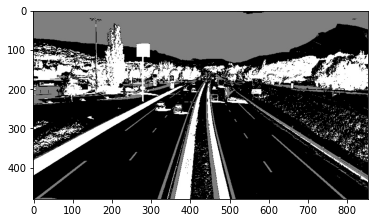

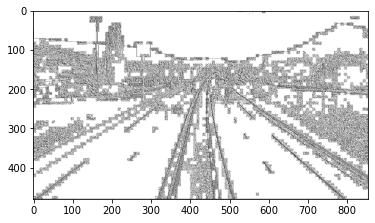

In [47]:
def get_pixel(img, center, x, y):
    
    new_value = 0
    
    try:
        # If local neighbourhood pixel
        # value is greater than or equal
        # to center pixel values then
        # set it to 1
        if img[x][y] >= center:
            new_value = 1

    except:
        # Exception is required when
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
        
    return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

    center = img[x][y]

    val_ar = []
    
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
    
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
    
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
    
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    
    # left
    val_ar.append(get_pixel(img, center, x, y-1))

    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]

    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]

    return val



path = 'image_segmented.jpg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image

img_lbp = np.zeros((height, width), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

In [39]:
def createNewWindow():
    newWindow = tk.Toplevel(app)

In [40]:
def close_window():
    fenetre.destroy()

In [22]:
import tkinter
from tkinter import *
from tkhtmlview  import HTMLLabel
from tkinter import *
import tkinter as tk
import PIL



fenetre = Tk()
fenetre.title("video Analytics")
fenetre.geometry('1200x500')
fenetre.iconbitmap('my_figure.png')
fenetre['bg']='light blue'



#l = Label(fenetre, text="Video analytics", font="courrier, 10", bg='light blue')
#l.pack(side= 'top')

my_label = LabelFrame(fenetre, text="", padx=10, pady=10)
my_label.pack(side='right')






l = HTMLLabel(my_label, html="""
  <h4> Réalisé par : Abdelazyz Rkhiss <img src='moi.png' hight='250'>   </h4>  """)
l.pack(side='right')


#my_label = HTMLLabel(l, html="""  <h4>
#Réalisé par : Abdelazyz Rkhiss </h4> """)
#my_label.pack(pady=20, padx=20)


#my_label = HTMLLabel(l, html="""  <video controls src="C:\Users\Zizu\Downloads\s3 cours et projets\analyse video\test.mp4">
#Le texte à afficher si la vidéo ne se charge pas </video> """)
# Adjust label
#my_label.pack(pady=20, padx=20)







btnlab = Frame(fenetre,borderwidth=2, relief=GROOVE)
btnlab.pack(side='top', padx=30, pady=30)



bouton1=Button(btnlab, text="video original" ,width=22, height=2,activebackground='#FFFF00', command=video_original)
bouton1.pack(pady=10, padx=20)


bouton2=Button(btnlab, text="diferrencing" ,width=22, height=2, command=diferancing)
bouton2.pack(pady=10, padx=20)

bouton3=Button(btnlab, text="diferrencing threshold" ,width=22, height=2, command=diferancing_threshold)
bouton3.pack(pady=10, padx=20)


bouton4=Button(btnlab, text="dirivé Temporelle" ,width=22, height=2, command=derive_temporelle)
bouton4.pack(pady=10, padx=20)


bouton5=Button(btnlab, text="dirivé Temporelle threshold" ,width=22, height=2, command=derive_temporelle_threshold)
bouton5.pack(pady=10, padx=20)


bouton6=Button(btnlab, text="mean" ,width=22, height=2, command=mean_def)
bouton6.pack(pady=10, padx=20)


bouton7=Button(btnlab, text="mean Threshold" ,width=22, height=2, command=mean_def_threshold)
bouton7.pack(pady=10, padx=20)


bouton8=Button(btnlab, text="median" ,width=22, height=2, command=median)
bouton8.pack(pady=10, padx=20)


button9=Button(btnlab, text="median thrshold",width=22, height=2, command=median_thrshold)
button9.pack(pady=10, padx=20)

button10=Button(btnlab, text="GMM_MOG2",width=22, height=2, command=MOG2)
button10.pack(pady=10, padx=20)








fenetre.mainloop()